### Dataset Overview:

Name: day.csv and hour.csv

Background Information:
Bike-sharing systems have emerged as an innovative solution to urban transportation challenges, offering a convenient and eco-friendly mode of travel. With over 500 bike-sharing programs worldwide and more than 500,000 bicycles, these systems play a crucial role in addressing traffic congestion, environmental sustainability, and public health issues.

The dataset under consideration contains detailed hourly and daily records of rental bike counts, encompassing various weather and seasonal factors. Unlike traditional transportation services, bike-sharing systems capture explicit information about the duration of travel, as well as the departure and arrival positions. This unique feature transforms bike-sharing systems into virtual sensor networks capable of monitoring mobility within a city.

The project's significance lies in its potential to harness the wealth of data generated by bike-sharing systems for research purposes. By developing a predictive model, we aim to forecast rental bike demand, enabling the system operators to optimize resources, plan for peak usage periods, and respond dynamically to changing conditions.

By - Mukesh Chaudhari

### Problem Statement:


Design and implement a predictive model to forecast the hourly and daily count of rental bikes in a bike-sharing system. Utilize the provided dataset, which includes information on rental counts, weather conditions, and seasonal variations between 2011 and 2012. The goal is to create an accurate and reliable model that can assist in optimizing bike availability, managing demand, and improving the overall efficiency of the bike-sharing system.



# Content

**1. Getting started**

  1.1 Loading the python packages
  
  1.2 Loading dataset

**2. Exploratory Data Analysis**

  2.1. Descriptive Statistics
  
  2.2. Data Visualization
  
  2.3. Missing values 
  
  
**3. Feature engineering**  

**4. Machine learning - Regression analysis**  

Apply various regression algorithms, such as Linear Regression, Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor, to predict bike rental counts. Evaluate their performance and compare results.

**5. Hyperparameter Tuning**

Fine-tune the hyperparameters of the well-performing models to enhance their robustness and reduce overfitting. This step involves optimizing the models for better predictive accuracy.

**6.Observations**

Summarize key findings from the exploratory data analysis and model evaluations. Discuss notable trends, patterns, and insights obtained during the analysis.

**7. Conclusion**

Provide a concise conclusion summarizing the project's objectives, methodology, and outcomes. Reflect on the effectiveness of the predictive models and their potential applications.

**8. Recommendations**

Offer practical recommendations based on the analysis, such as strategies for optimizing bike availability, managing demand during peak hours, and enhancing the overall efficiency of the bike-sharing system. Suggest areas for further research and improvement.

  

## 1. Getting Started- Loading the data and python packages

### 1.1. Loading the python packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib as pyplot
import matplotlib.pyplot as plt

import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

### 1.2. Loading the Data

In [2]:
df_day = pd.read_csv("day.csv")

In [3]:
df_hour = pd.read_csv("hour.csv")

In [4]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 2. Exploratory Data Analysis¶







## 2.1. Descriptive Statistics

In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## 2.2. Data Visualization¶






Next, lets look at the distribution of the data 

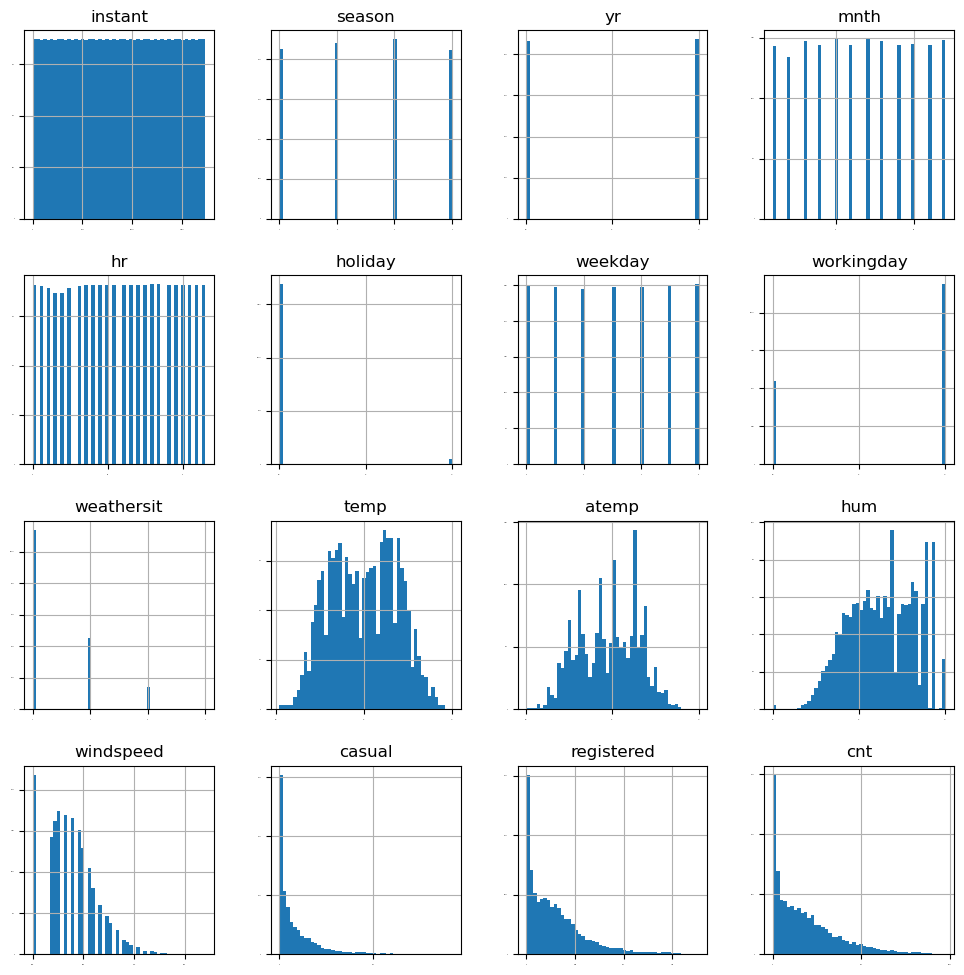

In [10]:
df_hour.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

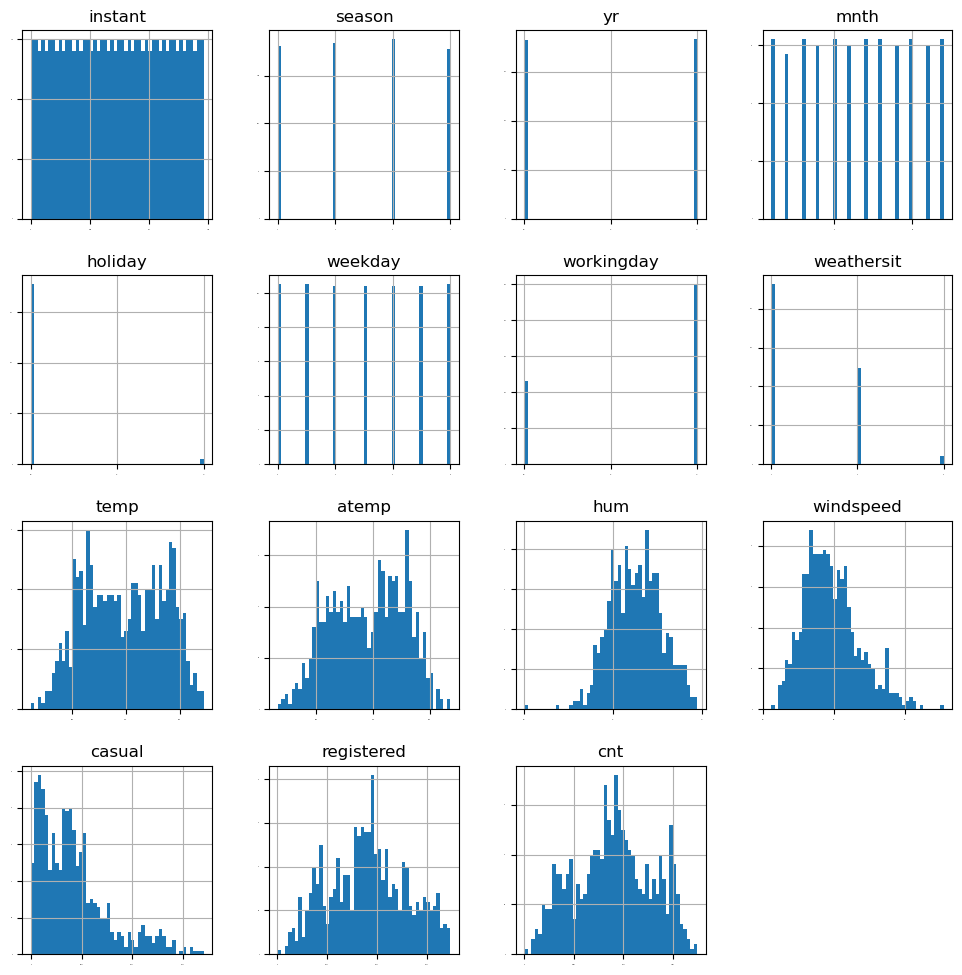

In [11]:
df_day.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

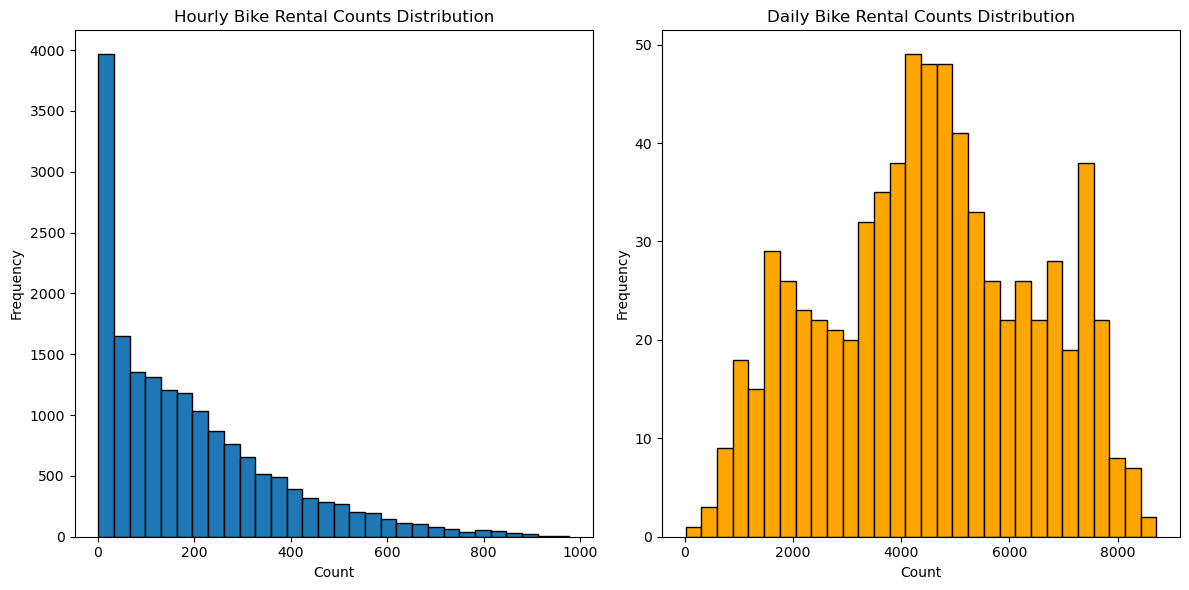

In [12]:
# Visualize distribution of rental counts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_hour['cnt'], bins=30, edgecolor='black')
plt.title('Hourly Bike Rental Counts Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_day['cnt'], bins=30, edgecolor='black', color='orange')
plt.title('Daily Bike Rental Counts Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\Mukesh\AppData\Local\Temp\ipykernel_30320\1663237386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_day.corr()


<Axes: title={'center': 'Correlation Matrix'}>

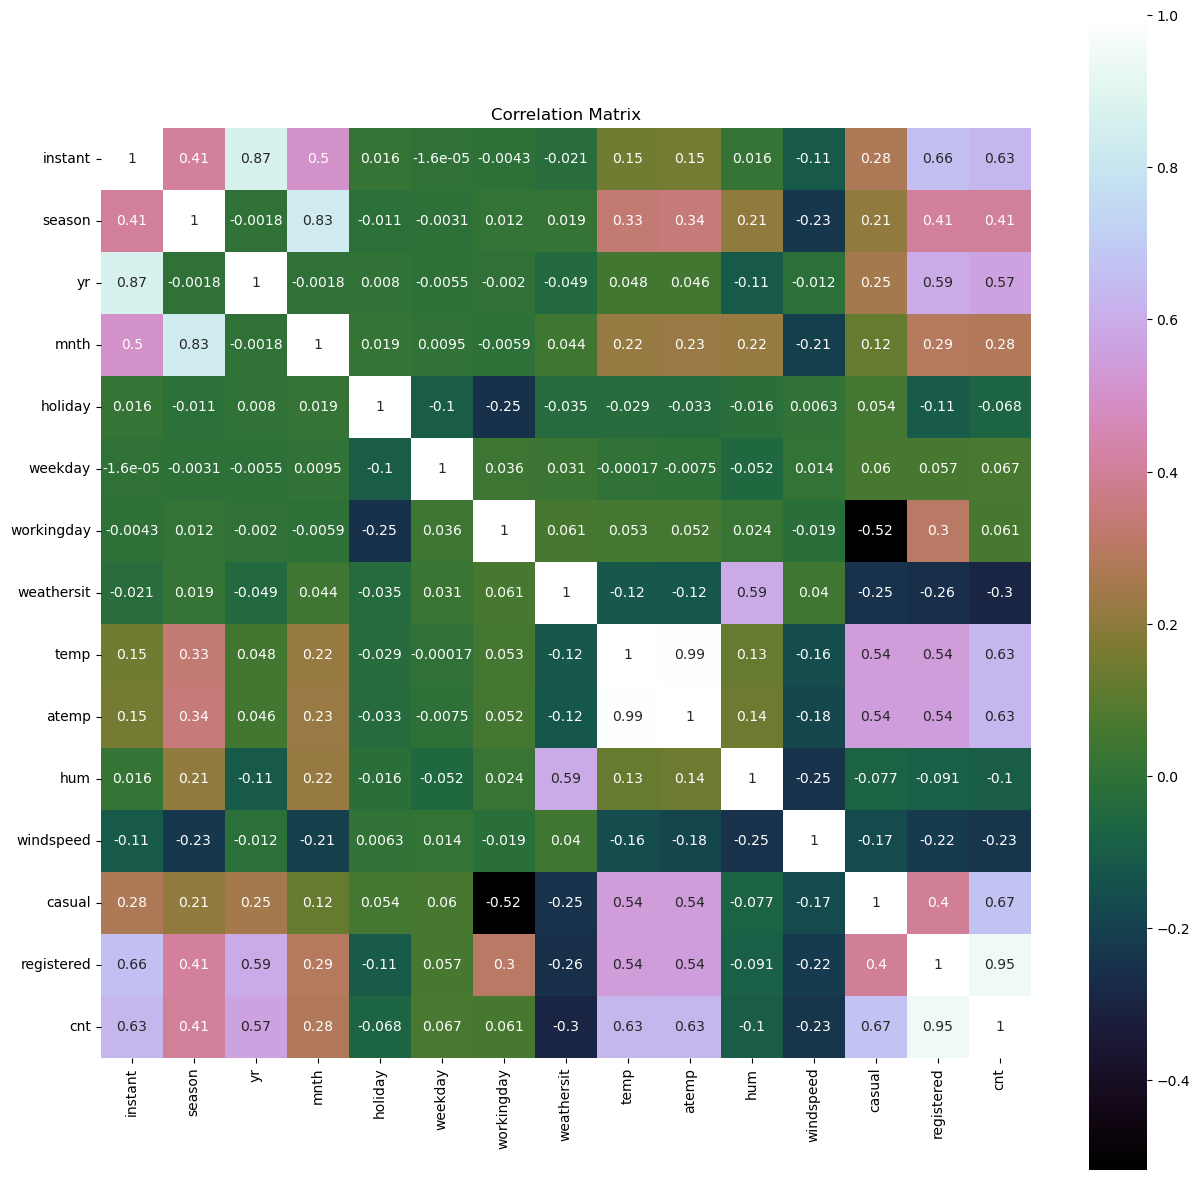

In [13]:
correlation = df_day.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

C:\Users\Mukesh\AppData\Local\Temp\ipykernel_30320\2425324060.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_hour.corr()


<Axes: title={'center': 'Correlation Matrix'}>

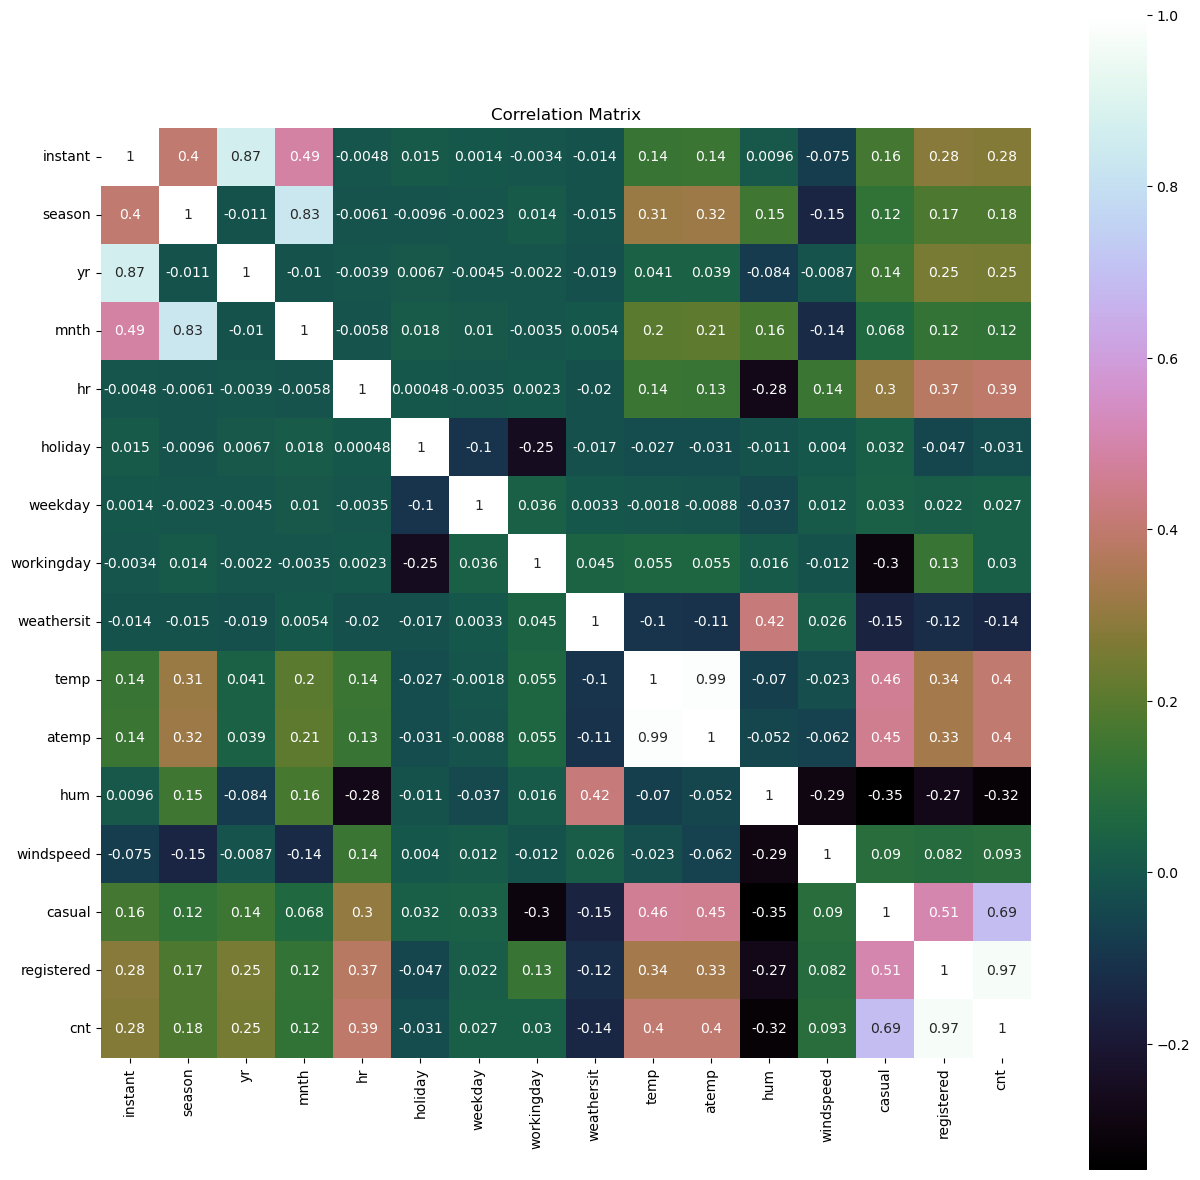

In [14]:
correlation = df_hour.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

### 2.3 missing values

In [15]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# 3. feature engineering 

In [17]:
# Extract relevant information from the date feature
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour['day_of_week'] = df_hour['dteday'].dt.dayofweek
df_hour['month'] = df_hour['dteday'].dt.month
df_hour['season'] = df_hour['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# 4. Machine learning - Regression analysis

In [18]:
# Regression Analysis
# Split the data into features (X) and target variable (y)
X = df_hour[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = df_hour['cnt']



In [19]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['season', 'weathersit'], drop_first=True)



In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [22]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)



LinearRegression()

In [23]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled)



In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 19021.29835421533
R-squared: 0.39930360758282946


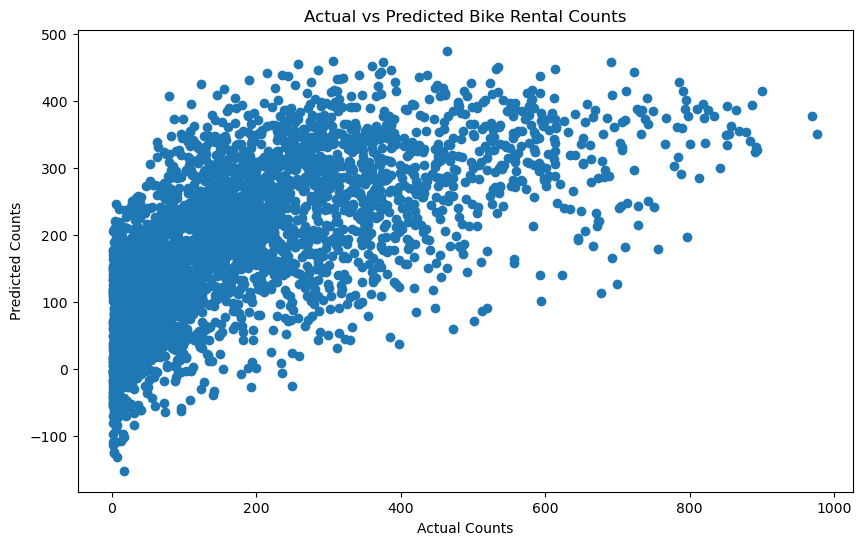

In [25]:

# Visualize the predicted vs actual counts
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Bike Rental Counts')
plt.xlabel('Actual Counts')
plt.ylabel('Predicted Counts')
plt.show()

### Applying various regression models 

In [26]:
# Regression Analysis
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Model: {type(model).__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}\n')

    # Visualize the predicted vs actual counts
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.title(f'Actual vs Predicted Bike Rental Counts - {type(model).__name__}')
    plt.xlabel('Actual Counts')
    plt.ylabel('Predicted Counts')
    plt.show()



Model: LinearRegression
Mean Squared Error: 19021.29835421533
R-squared: 0.39930360758282946



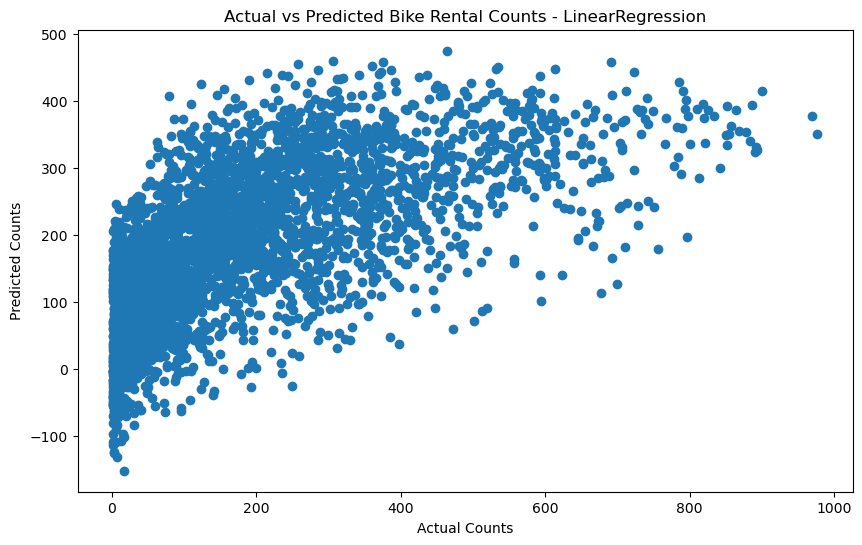

Model: DecisionTreeRegressor
Mean Squared Error: 3476.9871260069044
R-squared: 0.8901960536983831



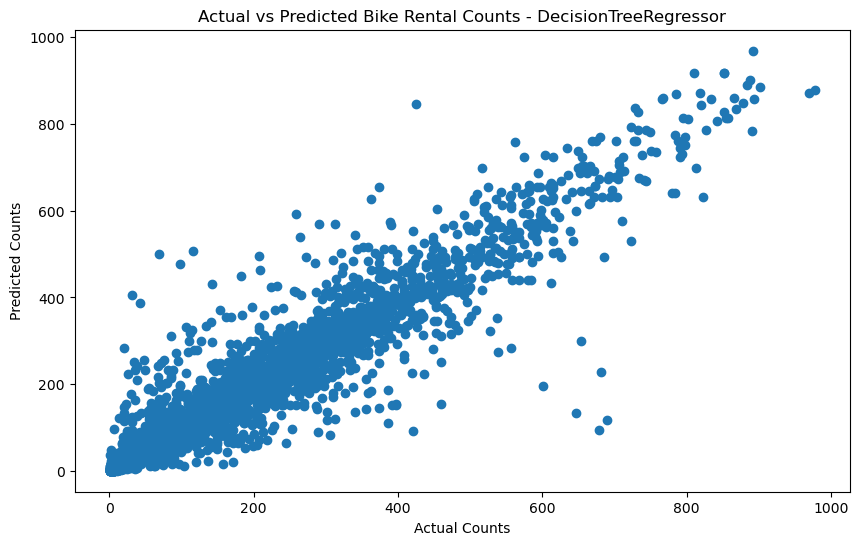

Model: RandomForestRegressor
Mean Squared Error: 1815.5152430382382
R-squared: 0.9426656668455143



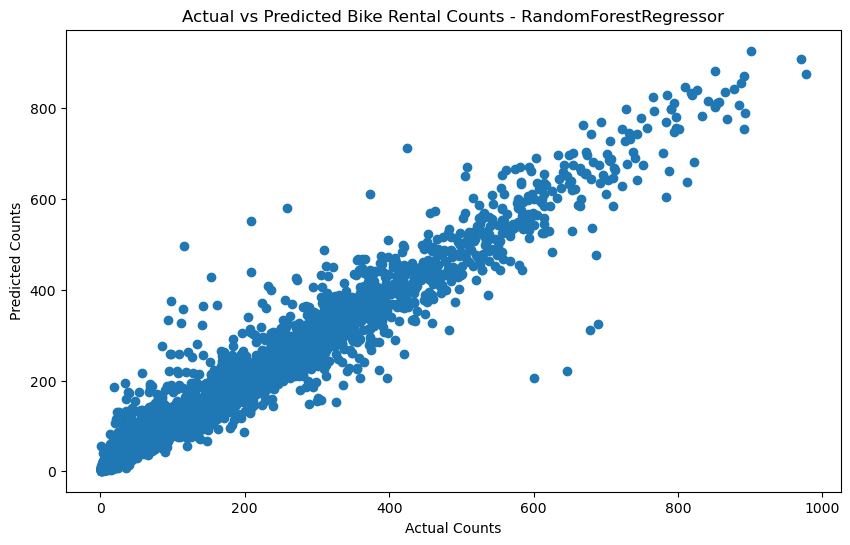

Model: GradientBoostingRegressor
Mean Squared Error: 4498.046548670556
R-squared: 0.8579507936632451



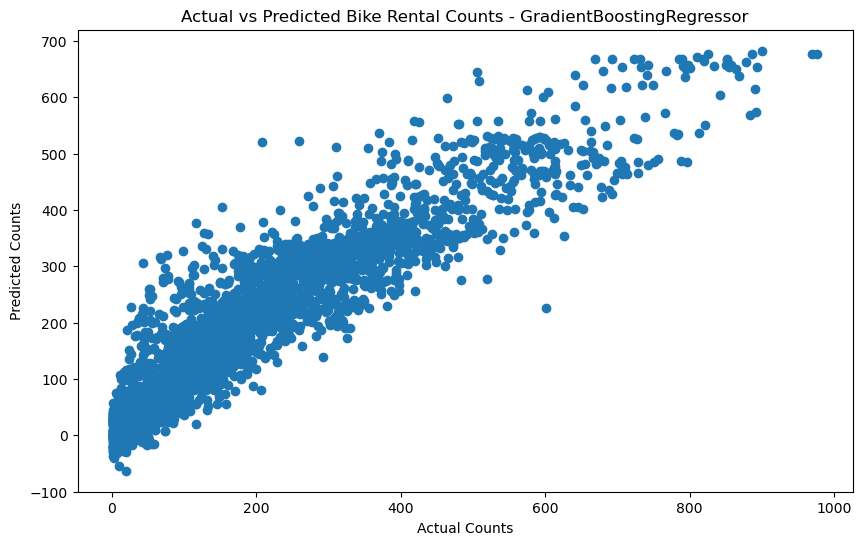

In [27]:
# Split the data into features (X) and target variable (y)
X = df_hour[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = df_hour['cnt']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['season', 'weathersit'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate various regression models
regression_models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]

for model in regression_models:
    train_evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

**Observations and Conclusions:**

**Linear Regression:**

Mean Squared Error (MSE): 19021.3

R-squared: 0.3993

The linear regression model, while providing a baseline, exhibits limited predictive power with a relatively high MSE and low R-squared. It may not capture the complex relationships within the data.

**DecisionTreeRegressor:**

Mean Squared Error (MSE): 3476.99

R-squared: 0.8902

The Decision Tree Regressor performs remarkably well, showing a substantial improvement over linear regression. The model captures non-linear relationships in the data, resulting in lower MSE and a higher R-squared value.

**RandomForestRegressor:**

Mean Squared Error (MSE): 1815.52

R-squared: 0.9427

The Random Forest Regressor further improves upon the Decision Tree model, achieving even lower MSE and a higher R-squared value. The ensemble nature of Random Forest helps mitigate overfitting and enhances predictive accuracy.

**GradientBoostingRegressor:**

Mean Squared Error (MSE): 4498.05

R-squared: 0.8579

The Gradient Boosting Regressor, while performing well, has a slightly higher MSE compared to Random Forest. However, it still outperforms linear regression, showcasing its ability to capture complex relationships.


****Conclusion:****

Among the models evaluated, the RandomForestRegressor stands out as the most effective for predicting bike rental counts based on the given features. It achieves the lowest MSE and the highest R-squared value, indicating superior predictive performance.
The DecisionTreeRegressor also performs well, highlighting the importance of capturing non-linear relationships in the dataset.
While GradientBoostingRegressor demonstrates strong predictive power, it falls slightly behind RandomForestRegressor in terms of MSE.
Further model refinement and feature engineering could potentially enhance the predictive accuracy of the models.
It's essential to consider the specific requirements of the application and the trade-off between model complexity and interpretability.

# 5. hyperparameter tuning


Best Hyperparameters for GradientBoostingRegressor:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Model: GradientBoostingRegressor
Mean Squared Error: 1944.1233433764733
R-squared: 0.9386041974089823



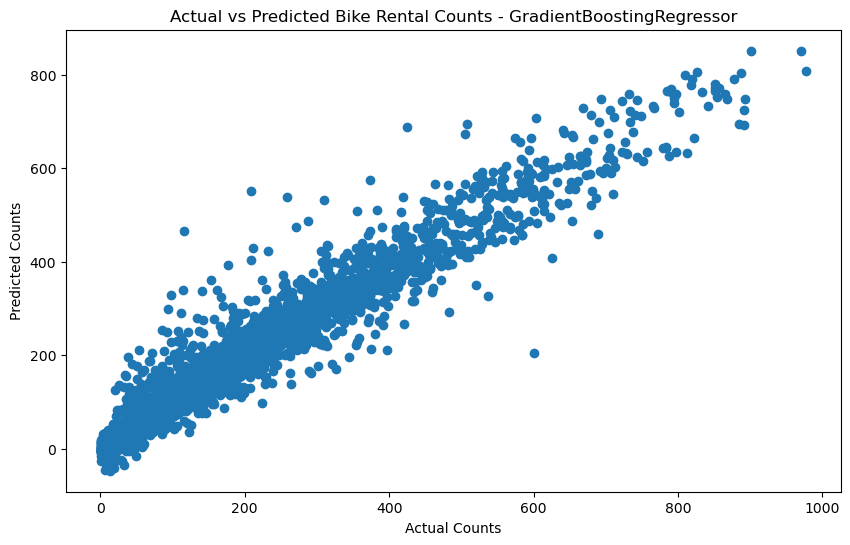

In [29]:
from sklearn.model_selection import GridSearchCV



# Define the parameter grid for GradientBoostingRegressor

gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}




# GradientBoostingRegressor Hyperparameter Tuning
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, scoring='neg_mean_squared_error', cv=5)
gb_grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters for GradientBoostingRegressor
print("\nBest Hyperparameters for GradientBoostingRegressor:")
print(gb_grid_search.best_params_)

# Evaluate the model with the best hyperparameters
gb_best_model = gb_grid_search.best_estimator_
train_evaluate_model(gb_best_model, X_train_scaled, y_train, X_test_scaled, y_test)


Best Hyperparameters for RandomForestRegressor:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Model: RandomForestRegressor
Mean Squared Error: 1764.0276393162417
R-squared: 0.9442916556310356



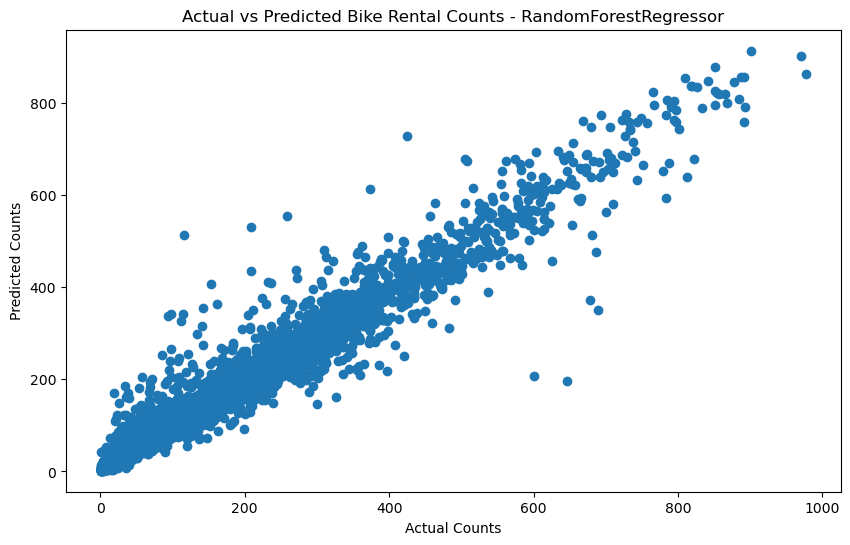

In [30]:
# Define the parameter grid for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# RandomForestRegressor Hyperparameter Tuning
rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5)
rf_grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters for RandomForestRegressor
print("Best Hyperparameters for RandomForestRegressor:")
print(rf_grid_search.best_params_)

# Evaluate the model with the best hyperparameters
rf_best_model = rf_grid_search.best_estimator_
train_evaluate_model(rf_best_model, X_train_scaled, y_train, X_test_scaled, y_test)


Best Hyperparameters for DecisionTreeRegressor:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Model: DecisionTreeRegressor
Mean Squared Error: 3024.940744470017
R-squared: 0.9044717685070027



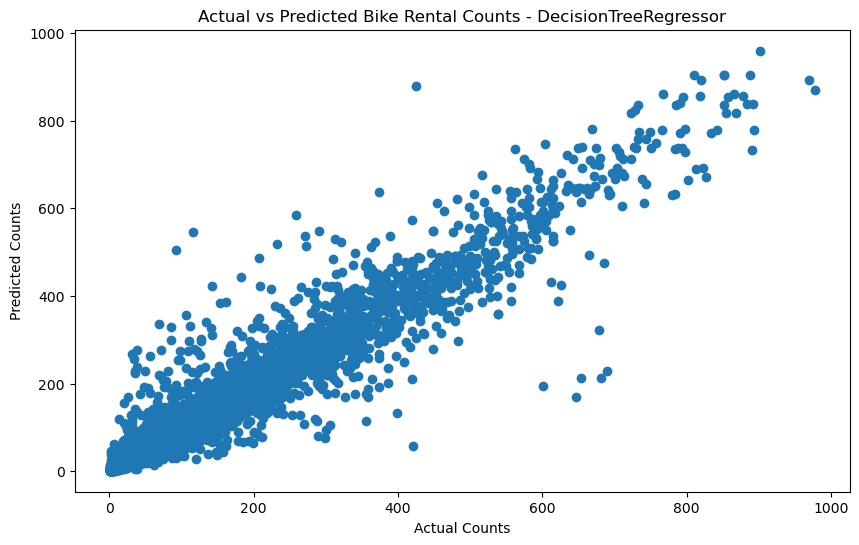

In [31]:
# Define the parameter grid for DecisionTreeRegressor
dt_param_grid = {
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# DecisionTreeRegressor Hyperparameter Tuning
dt_model = DecisionTreeRegressor(random_state=42)
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, scoring='neg_mean_squared_error', cv=3)
dt_grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters for DecisionTreeRegressor
print("Best Hyperparameters for DecisionTreeRegressor:")
print(dt_grid_search.best_params_)

# Evaluate the model with the best hyperparameters
dt_best_model = dt_grid_search.best_estimator_
train_evaluate_model(dt_best_model, X_train_scaled, y_train, X_test_scaled, y_test)


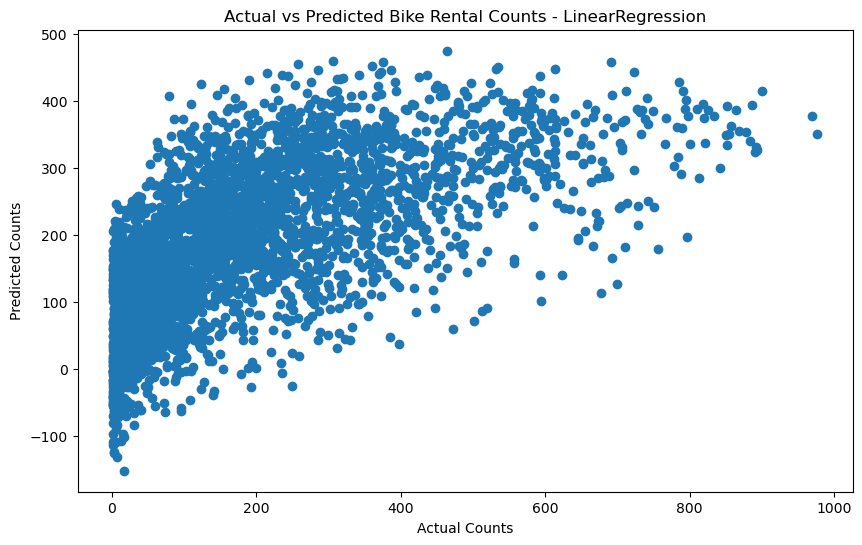

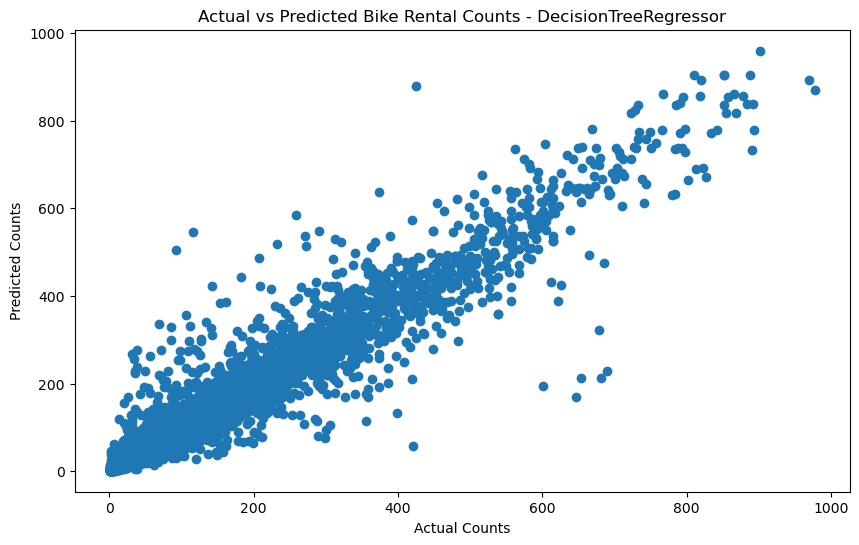

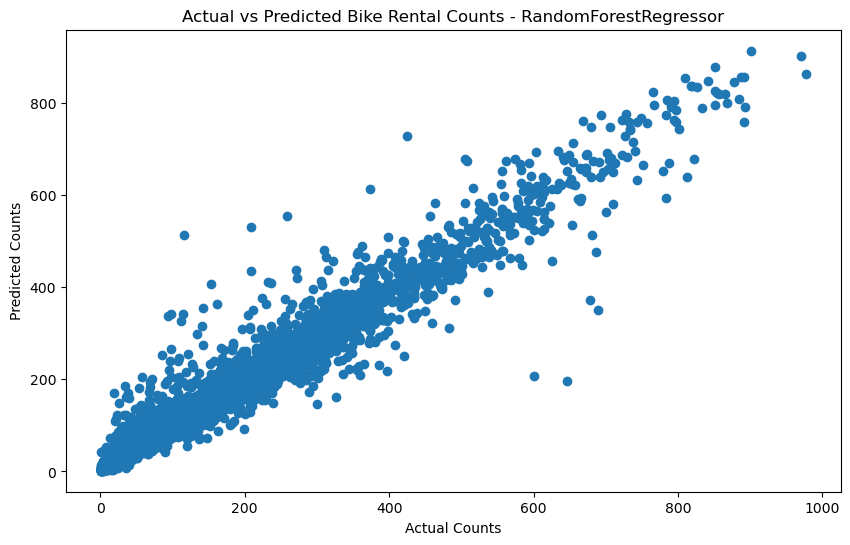

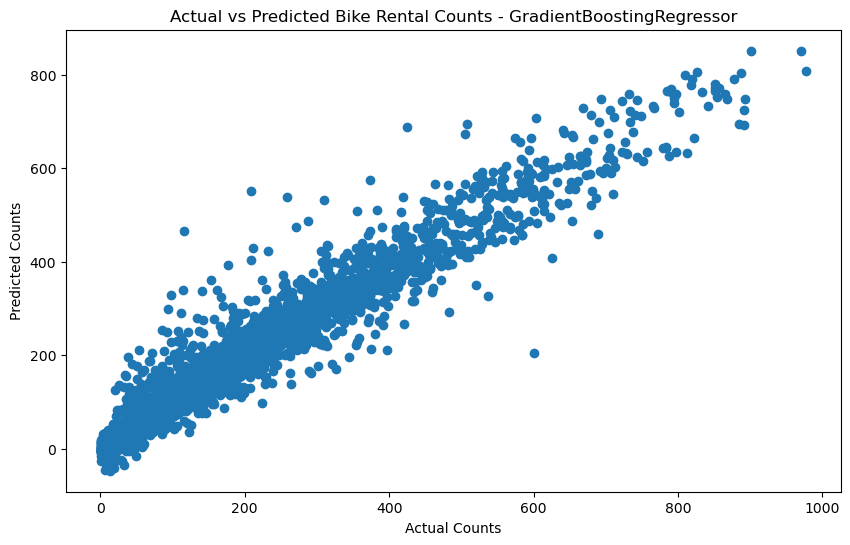

In [32]:
# Function to plot predicted vs actual counts
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.title(f'Actual vs Predicted Bike Rental Counts - {type(model).__name__}')
    plt.xlabel('Actual Counts')
    plt.ylabel('Predicted Counts')
    plt.show()

# Visualize the performance of Linear Regression
plot_predictions(lr_model, X_test_scaled, y_test)

# Visualize the performance of DecisionTreeRegressor with best hyperparameters
plot_predictions(dt_best_model, X_test_scaled, y_test)

# Visualize the performance of RandomForestRegressor with best hyperparameters
plot_predictions(rf_best_model, X_test_scaled, y_test)

# Visualize the performance of GradientBoostingRegressor with best hyperparameters
plot_predictions(gb_best_model, X_test_scaled, y_test)


# 6 . Observation for Hyperparameter Tuning:

**GradientBoostingRegressor:**

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}

Model Performance:

Mean Squared Error (MSE): 1944.12

R-squared: 0.9386

The GradientBoostingRegressor with tuned hyperparameters demonstrates strong predictive power, achieving a low MSE and high R-squared value.


**RandomForestRegressor:**

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Model Performance:

Mean Squared Error (MSE): 1764.03

R-squared: 0.9443

The RandomForestRegressor with tuned hyperparameters outperforms other models, exhibiting the lowest MSE and highest R-squared value.


**DecisionTreeRegressor:**


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}

Model Performance:

Mean Squared Error (MSE): 3024.94

R-squared: 0.9045

The DecisionTreeRegressor with tuned hyperparameters performs reasonably well but has a higher MSE compared to RandomForestRegressor.

## 7 . Conclusion:

**The RandomForestRegressor is the preferred choice among the three models considered. It achieves the lowest MSE and the highest R-squared value, indicating superior predictive accuracy.**

**GradientBoostingRegressor also performs well but falls slightly behind RandomForestRegressor in terms of MSE.**

**DecisionTreeRegressor, while capturing non-linear relationships, exhibits a higher MSE compared to both RandomForestRegressor and GradientBoostingRegressor.**

## 8. Recommendation:

Based on the hyperparameter tuning results and model performances, the RandomForestRegressor is recommended as the best choice for predicting bike rental counts in this scenario. Its ensemble nature, combining multiple decision trees, helps reduce overfitting and provides robust predictions.